In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os 

# Lets move dir to where the data is stored

In [18]:
path = "/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Epanet_python/validation_data" # mac
# path = r"C:\Users\frodi\Documents\OptimisedHeating\Epanet_python\validation_data" # windows

os.chdir(path)

print(os.listdir())

['rs_sim_flow.csv', 'VE_nedri_actual_power.csv', 'flow_values_VE_nedri.csv', 'VE_efri_actual_energy.csv', 'RS_energy_sim.csv', 'rjupnasalir_two_pumps_actual.csv', 'VE_pumps_sim.csv', 'flow_values_VE_efri.csv', 'VE_nedri_flow_sim.csv', 'rs_actual_flow.csv', 'rs_sim_energy.csv', 'flow_VE_efri_sim.csv', 'VE_nedri_pumps_energy_sim.csv']


# Lets load data

In [11]:
RS_flow = pd.read_csv("rs_actual_flow.csv")
RS_flow = RS_flow.copy()
RS_flow = RS_flow.drop(columns=["start_time"])
RS_flow = RS_flow.rename(columns={"value" : "VE_efri_actual_flow"})

RS_flow = RS_flow[:22]


print(RS_flow)

    VE_efri_actual_flow
0                 57.07
1                 56.55
2                 55.77
3                 55.86
4                 55.47
5                 55.08
6                 55.98
7                 56.13
8                 57.63
9                 59.15
10                59.36
11                58.96
12                57.73
13                56.57
14                55.24
15                55.92
16                56.93
17                58.48
18                58.44
19                56.41
20                54.18
21                51.82


In [14]:
RS_power = pd.read_csv("rjupnasalir_two_pumps_actual.csv")
RS_power = RS_power.drop(columns=["start_time","mpoint_id"])
RS_power = RS_power.rename(columns={"value" : "RS_actual_power"})

RS_power = RS_power[:22]

print(RS_power)


    RS_actual_power
0         22.420542
1         22.144892
2         21.904121
3         21.629350
4         21.719074
5         21.664591
6         21.455913
7         21.745120
8         21.871864
9         22.256314
10        22.706521
11        22.753035
12        22.758789
13        22.344508
14        21.994912
15        21.554324
16        21.797028
17        22.126756
18        22.551423
19        22.551804
20        21.962070
21        21.243678


In [16]:
RS_flow_sim = pd.read_csv("rs_sim_flow.csv")
RS_flow_sim = RS_flow_sim.drop(columns = ["Time (hrs)"])
RS_flow_sim = RS_flow_sim.rename(columns={"Flow Pipe-62614 (LPS)" : "RS_simulated_flow"})

print(RS_flow_sim)


    RS_simulated_flow
0           17.788370
1           17.506588
2           17.080254
3           16.915461
4           16.700190
5           17.195374
6           17.277519
7           18.089672
8           17.426559
9           18.896891
10          19.007257
11          18.796782
12          18.143236
13          17.517450
14          16.788702
15          17.162493
16          17.712709
17          18.542917
18          18.521696
19          17.430395
20          16.199520
21          14.836743


In [20]:
RS_power_sim = pd.read_csv("RS_energy_sim.csv")
RS_power_sim = RS_power_sim.drop(columns = ["Time (hrs)", "Rjúpnasalir 2 (kW)"])
RS_power_sim = RS_power_sim.rename(columns={"Rjúpnasalir 1 (kW)": "RS_simulated_power"})

print(RS_power_sim)


    RS_simulated_power
0            23.195690
1            23.045263
2            22.820494
3            22.734198
4            22.622261
5            22.880930
6            22.924112
7            23.358192
8            23.002819
9            23.801645
10           23.863180
11           23.746040
12           23.387260
13           23.051033
14           22.668133
15           22.863670
16           23.155148
17           23.605774
18           23.594097
19           23.004848
20           22.364874
21           21.704576


In [21]:
VE_nedri_df = pd.concat([RS_flow,RS_power,RS_flow_sim,RS_power_sim], axis=1)
VE_nedri_df.head()

,VE_efri_actual_flow,RS_actual_power,RS_simulated_flow,RS_simulated_power
0,57.07,22.420542,17.788370,23.195690
1,56.55,22.144892,17.506588,23.045263
2,55.77,21.904121,17.080254,22.820494
3,55.86,21.629350,16.915461,22.734198
4,55.47,21.719074,16.700190,22.622261


In [9]:
VE_nedri_df["VE_efri_simulated_flow"] = VE_nedri_df["VE_efri_simulated_flow"] * 0.75
# VE_nedri_df["VE_nedri_simulated_power"] = VE_nedri_df["VE_nedri_simulated_power"] * (1/8)


VE_nedri_df.head()

,start_time,value,VE_efri_actual_power,VE_efri_simulated_flow,VE_efri_simulated_power
0,2024-11-03 01:00:00,57.07,8.906800,12.345307,8.018060
1,2024-11-03 02:00:00,56.55,8.738703,12.565145,8.159202
2,2024-11-03 03:00:00,55.77,8.819042,12.783374,8.299225
3,2024-11-03 04:00:00,55.86,8.937070,13.375657,8.678807
4,2024-11-03 05:00:00,55.47,9.151142,13.658950,8.860128


KeyError: "['VE_efri_actual_flow'] not in index"

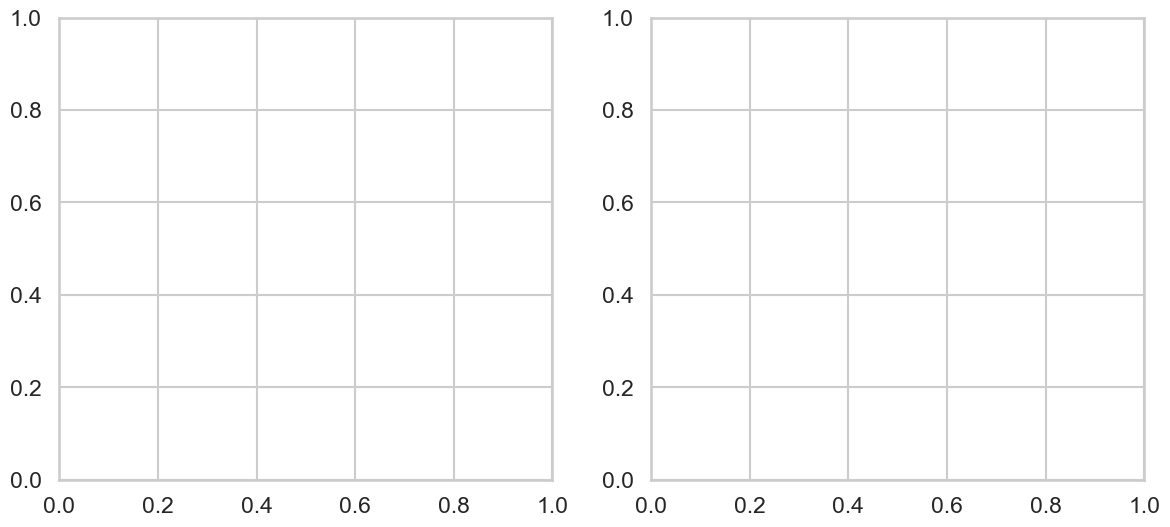

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for clean plots
sns.set(style="whitegrid", context="talk")

# Create subplots: 1 row, 2 columns, wider figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Actual vs Simulated Flow
sns.lineplot(ax=axes[0], data=VE_nedri_df[["VE_efri_actual_flow", "VE_efri_simulated_flow"]])
axes[0].set_title("Actual vs Simulated Flow")
axes[0].set_xlabel("Sample")
axes[0].set_ylabel("Flow LPS")
axes[0].legend(["Actual", "Simulated"])
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Plot 2: Actual vs Simulated Power
sns.lineplot(ax=axes[1], data=VE_nedri_df[["VE_efri_actual_power", "VE_efri_simulated_power"]])
axes[1].set_title("Actual vs Simulated Power")
axes[1].set_xlabel("Sample")
axes[1].set_ylabel("Power (kW)")
axes[1].legend(["Actual", "Simulated"])
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from scipy.stats import pearsonr

# For Flow
actual_flow = VE_nedri_df["VE_efri_actual_flow"]
sim_flow = VE_nedri_df["VE_efri_simulated_flow"]

mae_flow = mean_absolute_error(actual_flow, sim_flow)
rmse_flow = np.sqrt(mean_squared_error(actual_flow, sim_flow))
r_flow, p_flow = pearsonr(actual_flow, sim_flow)

print(f"Flow MAE: {mae_flow:.3f}")
print(f"Flow RMSE: {rmse_flow:.3f}")
print(f"Flow Pearson r: {r_flow:.3f} (p = {p_flow:.3g})")

# For Power
actual_power = VE_nedri_df["VE_efri_actual_power"]
sim_power = VE_nedri_df["VE_efri_simulated_power"]

mae_power = mean_absolute_error(actual_power, sim_power)
rmse_power = np.sqrt(mean_squared_error(actual_power, sim_power))
r_power, p_power = pearsonr(actual_power, sim_power)

print(f"Power MAE: {mae_power:.3f}")
print(f"Power RMSE: {rmse_power:.3f}")
print(f"Power Pearson r: {r_power:.3f} (p = {p_power:.3g})")


MAE = 0.769
On average, the simulated flow values differ from the actual flow by about 0.77 units (likely liters per second). This is your typical absolute error.
RMSE = 0.836
The root mean squared error is slightly higher than MAE, meaning there are some errors that are a bit larger (since RMSE penalizes larger errors more).
Pearson r = 1.000 (p = 1.88e-36)
This indicates an almost perfect linear correlation between actual and simulated flows. The p-value is essentially zero, confirming this strong correlation is statistically significant.
Interpretation: Your flow simulation is very accurate, with errors less than 1 L/s on average and almost perfect correlation with actual data.

Power:
MAE = 0.410
On average, the simulated power deviates from actual power by about 0.41 kW.
RMSE = 0.514
Slightly higher than MAE, showing there are some points with larger deviation, but still fairly close overall.
Pearson r = 0.923 (p = 9.46e-10)
This is a very strong positive linear correlation between simulated and actual power, also highly statistically significant.
Interpretation: Power simulation is quite good, with slightly larger errors relative to flow, but still strongly correlated with actual measurements.